International Labour Organization API with Python
=====

## Canada unemployment rate

*February 2026*<br>
*@bd_econ*

-----

ILO API Documentation is [here](https://sdmx.ilo.org/)

The ILO provides labor statistics for many countries through an SDMX REST API. This example retrieves monthly unemployment rate data for Canada and plots the results.

Browse data at [ILOSTAT](https://ilostat.ilo.org/).

In [1]:
import requests
import pandas as pd
import io

#### Parameters / Settings

The ILO SDMX API base URL is:

```
https://sdmx.ilo.org/rest/data/{agency},{dataflow},{version}/{key}
```

The version number (e.g., `1.0`) must be included. Use `Accept: text/csv` for CSV output.

In [2]:
# Dataflow: Unemployment rate by sex and age
# Dimensions: REF_AREA.FREQ.MEASURE.SEX.AGE
base = 'https://sdmx.ilo.org/rest/data'
flow = 'ILO,DF_UNE_DEAP_SEX_AGE_RT,1.0'

# Canada, monthly, total (both sexes), multiple age groups
key = 'CAN.M.UNE_DEAP_RT.SEX_T.AGE_YTHADULT_YGE15+AGE_YTHADULT_Y15-24+AGE_YTHADULT_YGE25'

url = f'{base}/{flow}/{key}'
params = {'startPeriod': '2005'}
headers = {'Accept': 'text/csv'}

#### Request data

In [3]:
r = requests.get(url, params=params, headers=headers)

if r.status_code == 200:
    print('Request status: Success!')
else:
    print(f'Request status: {r.status_code}')

Request status: Success!


#### Clean the data

The CSV response includes `REF_AREA`, `TIME_PERIOD`, `OBS_VALUE`, and dimension columns. Pivot the age groups into columns.

In [4]:
df = pd.read_csv(io.StringIO(r.text))

# Rename age groups for readability
age_labels = {
    'AGE_YTHADULT_YGE15': 'Total (15+)',
    'AGE_YTHADULT_Y15-24': 'Youth (15-24)',
    'AGE_YTHADULT_YGE25': 'Adult (25+)'
}

data = df.set_index(['TIME_PERIOD', 'AGE'])['OBS_VALUE'].unstack()
data = data.rename(columns=age_labels)
data.index = pd.to_datetime(data.index, format='%Y-M%m')
data = data.sort_index()
data.index.name = ''
data.columns.name = ''
data.tail()

,Youth (15-24),Total (15+),Adult (25+)
,,,
2025-08-01,14.677,7.983,6.769
2025-09-01,14.395,6.631,5.426
2025-10-01,12.895,6.254,5.223
2025-11-01,11.960,6.111,5.201
2025-12-01,11.575,6.289,5.475


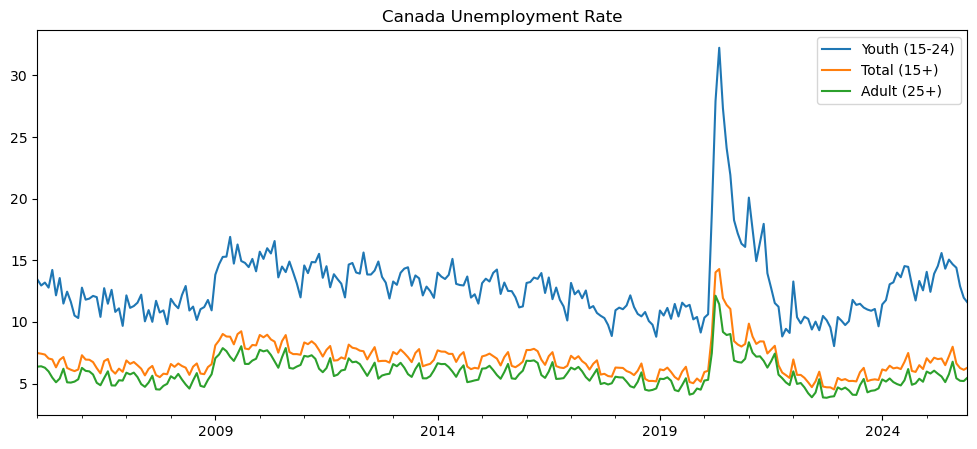

In [5]:
%matplotlib inline
data.plot(title='Canada Unemployment Rate', figsize=(12, 5));

#### Example 2: Multiple Countries

Compare annual unemployment rates across G7 countries.

In [6]:
key = 'CAN+USA+GBR+DEU+FRA+ITA+JPN.A.UNE_DEAP_RT.SEX_T.AGE_YTHADULT_YGE15'

url = f'{base}/{flow}/{key}'
params = {'startPeriod': '2010'}

r = requests.get(url, params=params, headers=headers)
df = pd.read_csv(io.StringIO(r.text))
data = df.set_index(['TIME_PERIOD', 'REF_AREA'])['OBS_VALUE'].unstack()
data.index.name = ''
data.columns.name = ''
data.tail()

,CAN,DEU,FRA,GBR,ITA,JPN,USA
,,,,,,,
2021,7.527,3.540,7.871,4.865,9.497,2.809,5.349
2022,5.280,3.099,7.303,3.768,8.069,2.615,3.650
2023,5.415,2.978,7.335,4.025,7.627,2.600,3.638
2024,6.351,3.364,7.436,4.361,6.499,2.500,4.022
2025,6.819,NaN,NaN,NaN,NaN,2.500,4.282
